In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# Bring Dataset names
dataset = sns.get_dataset_names()

In [3]:
dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### Self Practice 1. Pegnuins

In [4]:
pg = sns.load_dataset('penguins')

In [5]:
pg.head()
# From the Dataset, already can observe some NaN data from dataframe below

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [21]:
# can see that this data has 344 entries
# But when we see the Non-Null Count, 
# some Column has 342(-2) data value
# For more accurate calculation + visualization
# We will remove NaN values with the steps below.
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# Find the data that has NAN value from 'flipper_length_mm" category
pg[pg['flipper_length_mm'].isnull()] 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
# Check how many unique species from Pegnuins data
pg['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
# Create variable to put the not-NaN values (actual values)
# Could just put '0' to NaN by using fillna(0)
# But then, later at the violin graph
# Because of the lowest value '0' that we filled in
# It will be harder to observe the features
bill_length_mm = pg[pg['bill_length_mm'].isnull()==False]
bill_depth_mm = pg[pg['bill_depth_mm'].isnull()==False]
flipper_length_mm = pg[pg['flipper_length_mm'].isnull()==False]
body_mass_g = pg[pg['body_mass_g'].isnull()==False]
notnull_punguins = pg[pg['sex'].isnull()==False]

In [10]:
bill_depth_mm

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
notnull_punguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


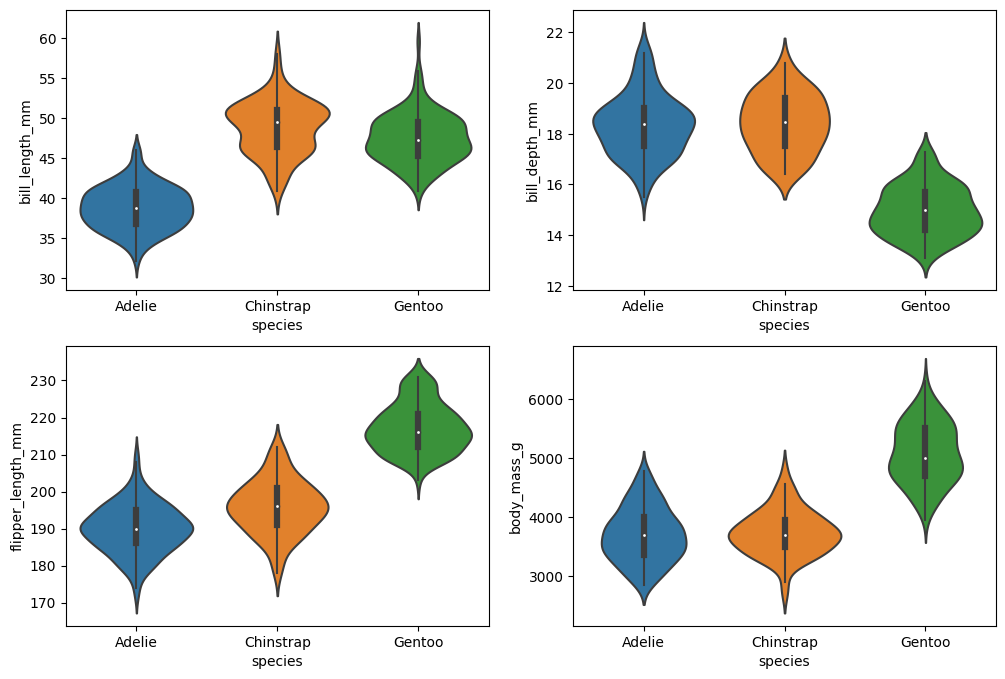

In [12]:
# Draw Violin Plot
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
  sns.violinplot(data=bill_length_mm, x='species', y=col, ax=ax[i//2][i%2])

plt.show()             

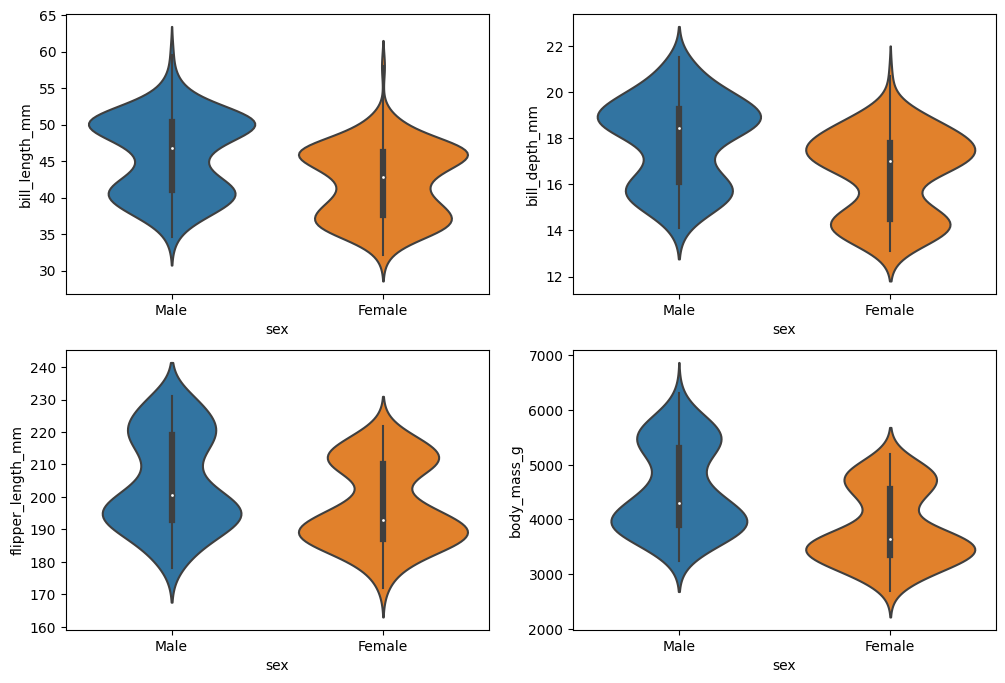

In [13]:
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
  sns.violinplot(data=notnull_punguins, x='sex', y=col, ax=ax[i//2][i%2])

plt.show()        

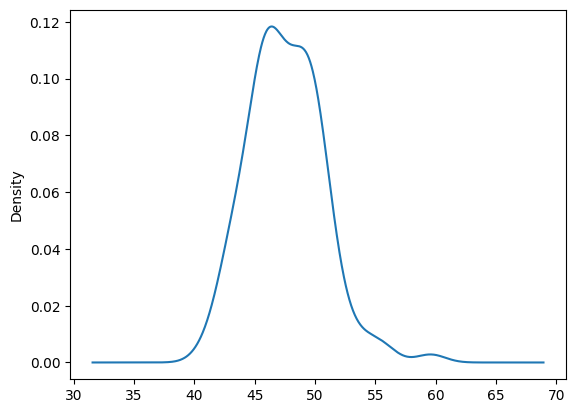

In [14]:
# 위의 그래프 중, 1-1에 Gentoo-bill_length_mm 부분을 가로로 눞힌 모양으로 그려져있음
notnull_punguins[notnull_punguins['species']=='Gentoo']['bill_length_mm'].plot.density()
plt.show()

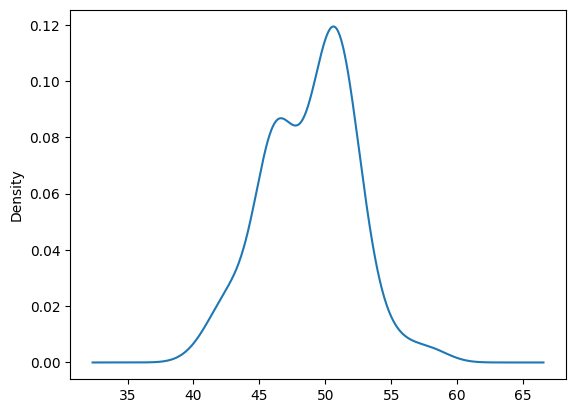

In [15]:
notnull_punguins[notnull_punguins['species']=='Chinstrap']['bill_length_mm'].plot.density()
plt.show()

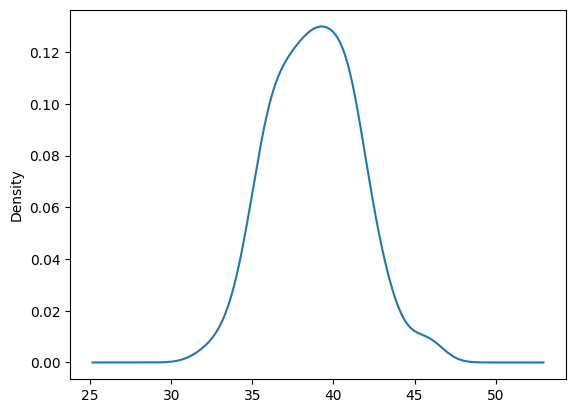

In [16]:
notnull_punguins[notnull_punguins['species']=='Adelie']['bill_length_mm'].plot.density()
plt.show()

### Self Practice 2. Car Crashes

In [17]:
cc= sns.load_dataset('car_crashes')
cc.info()
# From the Data Below, 52 entries with 51 non-null count values
# Which means no NaN values in the data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [18]:
cc.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [20]:
cc['abbrev'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)